In [1]:
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("../Datasets/XPR.csv")

In [3]:
df.head()

,Crypto,Date,Open,High,Low,Close
0,XRP,12/31/22,0.34,0.34,0.34,0.34
1,XRP,12/30/22,0.34,0.35,0.33,0.34
2,XRP,12/29/22,0.36,0.36,0.34,0.34
3,XRP,12/28/22,0.37,0.37,0.35,0.36
4,XRP,12/27/22,0.37,0.37,0.36,0.37


In [4]:
print("Dataframe Shape: " , df.shape)
print("Dataframe feature Datatypes: ", df.dtypes)
print("Dataframe Description: ", df.describe())

Dataframe Shape:  (1975, 6)
Dataframe feature Datatypes:  Crypto     object
Date       object
Open      float64
High      float64
Low       float64
Close     float64
dtype: object
Dataframe Description:                Open         High          Low        Close
count  1975.000000  1975.000000  1975.000000  1975.000000
mean      0.511838     0.533975     0.487266     0.510729
std       0.333890     0.358062     0.302996     0.330889
min       0.140000     0.150000     0.120000     0.140000
25%       0.290000     0.300000     0.280000     0.290000
50%       0.400000     0.410000     0.380000     0.400000
75%       0.630000     0.660000     0.600000     0.630000
max       2.780000     3.350000     2.550000     2.780000


In [5]:
df.isnull().sum()

Crypto    0
Date      0
Open      0
High      0
Low       0
Close     0
dtype: int64

In [6]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y')
df = df.sort_values('Date')

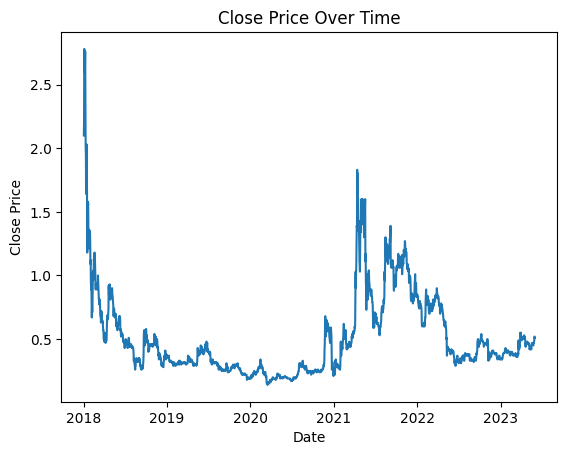

In [8]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(df['Date'], df['Close'])
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()


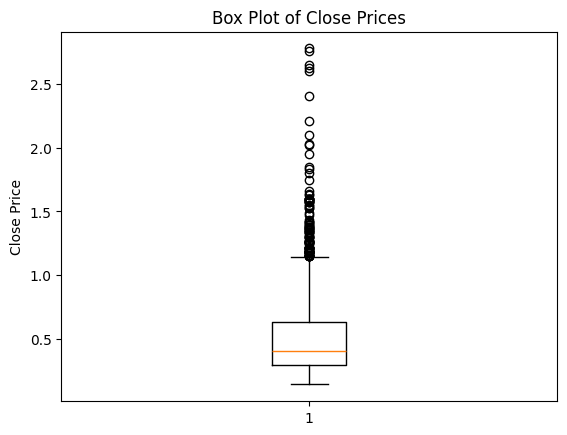

In [9]:

plt.figure()
plt.boxplot(df['Close'])
plt.title('Box Plot of Close Prices')
plt.ylabel('Close Price')
plt.show()

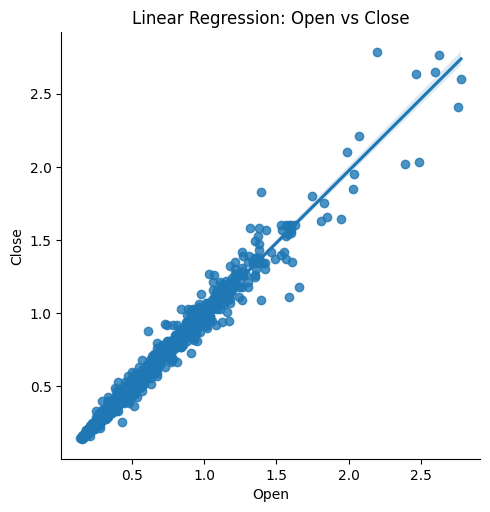

In [10]:
import seaborn as sns

sns.lmplot(x='Open', y='Close', data=df)
plt.title('Linear Regression: Open vs Close')
plt.show()

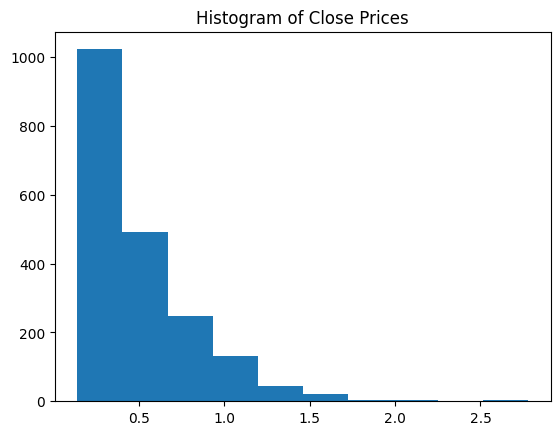

In [11]:
plt.figure()
plt.hist(df['Close'])
plt.title('Histogram of Close Prices')
plt.show()

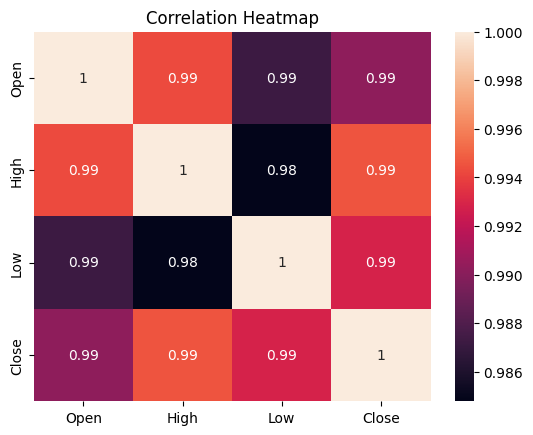

In [12]:
corr = df[['Open', 'High', 'Low', 'Close']].corr()

plt.figure()
sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [13]:
df = df.sort_values('Date').reset_index(drop=True)

In [14]:
df['Daily_Return'] = df['Close'].pct_change()
df['Log_Return'] = np.log(df['Close'] / df['Close'].shift(1))


In [15]:
df['MA_7']  = df['Close'].rolling(window=7).mean()
df['MA_14'] = df['Close'].rolling(window=14).mean()
df['MA_30'] = df['Close'].rolling(window=30).mean()

In [16]:
df['Volatility_7']  = df['Daily_Return'].rolling(window=7).std()
df['Volatility_14'] = df['Daily_Return'].rolling(window=14).std()

In [17]:
window = 14
delta = df['Close'].diff()
gain = delta.clip(lower=0)
loss = -delta.clip(upper=0)

avg_gain = gain.rolling(window).mean()
avg_loss = loss.rolling(window).mean()

rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))

In [18]:
exp12 = df['Close'].ewm(span=12, adjust=False).mean()
exp26 = df['Close'].ewm(span=26, adjust=False).mean()

df['MACD'] = exp12 - exp26
df['MACD_Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

In [19]:
df = df.dropna().reset_index(drop=True)

In [20]:
print(df.columns)
df.head()

Index(['Crypto', 'Date', 'Open', 'High', 'Low', 'Close', 'Daily_Return',
       'Log_Return', 'MA_7', 'MA_14', 'MA_30', 'Volatility_7', 'Volatility_14',
       'RSI', 'MACD', 'MACD_Signal'],
      dtype='object')


,Crypto,Date,Open,High,Low,Close,Daily_Return,Log_Return,MA_7,MA_14,MA_30,Volatility_7,Volatility_14,RSI,MACD,MACD_Signal
0,XRP,2018-01-31,1.09,1.14,1.00,1.12,0.027523,0.027151,1.220000,1.331429,1.747667,0.080952,0.087414,41.379310,-0.228057,-0.217187
1,XRP,2018-02-01,1.12,1.13,0.87,0.94,-0.160714,-0.175204,1.168571,1.285714,1.709000,0.096212,0.074087,20.370370,-0.240472,-0.221844
2,XRP,2018-02-02,0.94,0.98,0.62,0.89,-0.053191,-0.054658,1.122857,1.239286,1.665000,0.095622,0.074218,20.183486,-0.251447,-0.227764
3,XRP,2018-02-03,0.89,1.02,0.76,0.95,0.067416,0.065241,1.085714,1.195000,1.604000,0.103280,0.077972,22.321429,-0.252394,-0.232690
4,XRP,2018-02-04,0.95,0.96,0.77,0.81,-0.147368,-0.159428,1.008571,1.155000,1.544333,0.088551,0.080003,23.584906,-0.261428,-0.238438


In [21]:
from sklearn.preprocessing import MinMaxScaler

cols_to_scale = [
    'Open','High','Low','Close',
    'Daily_Return','Log_Return',
    'MA_7','MA_14','MA_30',
    'Volatility_7','Volatility_14',
    'RSI','MACD','MACD_Signal'
]

In [22]:
scaler = MinMaxScaler(feature_range=(1, 10))

df_scaled = df.copy()
df_scaled[cols_to_scale] = scaler.fit_transform(df_scaled[cols_to_scale])


In [23]:
print(df_scaled[cols_to_scale].min())
print(df_scaled[cols_to_scale].max())


Open             1.0
High             1.0
Low              1.0
Close            1.0
Daily_Return     1.0
Log_Return       1.0
MA_7             1.0
MA_14            1.0
MA_30            1.0
Volatility_7     1.0
Volatility_14    1.0
RSI              1.0
MACD             1.0
MACD_Signal      1.0
dtype: float64
Open             10.0
High             10.0
Low              10.0
Close            10.0
Daily_Return     10.0
Log_Return       10.0
MA_7             10.0
MA_14            10.0
MA_30            10.0
Volatility_7     10.0
Volatility_14    10.0
RSI              10.0
MACD             10.0
MACD_Signal      10.0
dtype: float64
